Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to t

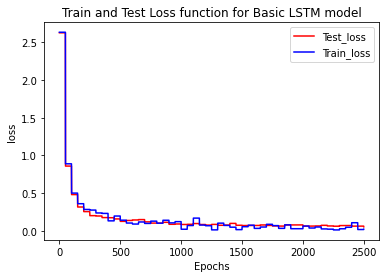

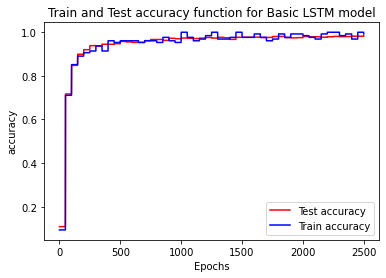

In [1]:
import tensorflow as tf 
from tensorflow.python.ops import rnn, rnn_cell
import numpy as np 
import matplotlib.pyplot as plt


if(tf.__version__.split('.')[0]=='2'):
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()    

# Load MNIST dataset
import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

learningRate = 1e-3
trainingIters = 2500
batchSize = 128
displayStep = 50
nInput = 28 
nSteps = 28 
nHidden = 128 #number of neurons for the RNN
nClasses = 10  

x = tf.placeholder('float', [None, nSteps, nInput])
y = tf.placeholder('float', [None, nClasses])

weights = {
	'out': tf.Variable(tf.random_normal([nHidden, nClasses]))
}

biases = {
	'out': tf.Variable(tf.random_normal([nClasses]))
}

def LSTMRNN(x, weights, biases):
	x = tf.transpose(x, [1,0,2])
	x = tf.reshape(x, [-1, nInput])
	x = tf.split(x, nSteps, 0) 

	lstmCell = rnn_cell.LSTMCell(nHidden, forget_bias= 1.0) 

	outputs, states = rnn.static_rnn(lstmCell, x, dtype = tf.float32) 

	return tf.matmul(outputs[-1], weights['out'])+ biases['out']

pred = LSTMRNN(x, weights, biases)

#cost, optimization, evaluation, and accuracy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
optimizer = tf.train.AdamOptimizer(learningRate).minimize(cost)
correctPred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32), name = 'accuracy')

init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  testData = mnist.test.images.reshape((-1, nSteps, nInput))
  testLabel = mnist.test.labels
	
  test_loss = []
  test_acc = []
  train_loss = []
  train_acc = []
  epoch = []
  for iter in range(trainingIters):
    batchX, batchY = mnist.train.next_batch(batchSize)
    batchX = batchX.reshape((batchSize, nSteps, nInput))
    #backprop
    sess.run(optimizer, feed_dict= {x: batchX, y: batchY})

    if iter % displayStep == 0 or iter == (trainingIters - 1):
      #Training batch accuracy 
      acc = sess.run(accuracy, feed_dict= {x: batchX, y: batchY})
      #Training batch loss
      loss = sess.run(cost, feed_dict= {x: batchX, y: batchY})
      #Test loss and accuracy
      testLoss, test_accuracy = sess.run([cost, accuracy], 
                                          feed_dict= {x: testData, y: testLabel}) 
      
      print("Iter " + str(iter) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc) + ", Test loss = " + \
                  "{:.6f}".format(testLoss) + ", Test Accuracy = " + \
                  "{:.5f}".format(test_accuracy)
            )
      #print('Iter {} Minibatch loss = {0.6f}, Training accuracy = {0.5f}'.format(iter, loss, acc))

    test_loss.append(testLoss)
    test_acc.append(test_accuracy)
    train_loss.append(loss)
    train_acc.append(acc)
    epoch.append(iter)

  print("Testing Accuracy: ", test_accuracy)

  #plot the train, validation and test loss function
  plt.figure()
  plt.plot(epoch, test_loss, 'r-', label = 'Test_loss')
  plt.plot(epoch, train_loss, 'b-', label = 'Train_loss')
  plt.title('Train and Test Loss function for Basic LSTM model')
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  #plot the train, validation and test accuracy
  plt.figure()
  plt.plot(epoch, test_acc, 'r-', label = 'Test accuracy')
  plt.plot(epoch, train_acc, 'b-', label = 'Train accuracy')
  plt.title('Train and Test accuracy function for Basic LSTM model')
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()